In [40]:
%pylab inline
%reload_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [41]:
import numpy as np
import random

In [42]:
''' 
Setting of mixed extension of Nash Equilibrium
1.  Set N = {1, 2, · · · , n} of players 
2.  For each player i, a set P_i of all mixed strategies of player i
3.  For each player, a payoff function Hi : ∏i∈N P_i → R, where each Hi
is a linear combination of his with coefficients equal to product of the
corresponding probabilities
'''

ROCK, PAPER, SCISSORS, NUM_ACTIONS = 0, 1, 2, 3 
regretSum = np.zeros(NUM_ACTIONS)
strategy = np.zeros(NUM_ACTIONS)
strategySum = np.zeros(NUM_ACTIONS)
# Opponent uses the mixed strat (R, S, P) = (0.4, 0.3, 0.3)
oppStrategy = np.array([0.4, 0.3, 0.3])


In [43]:
# All possible payoffs for p1 
def getValue(p1, p2):
    if p1 == p2:
        return 0 
    if p1 == ROCK and p2 == SCISSORS:
        return 1
    if p1 == SCISSORS and p2 == PAPER:
        return 1
    if p1 == PAPER and p2 == ROCK:
        return 1
    else:
        return -1

In [44]:
# accmulate in stratSum
def getStrategy():
    global regretSum, strategySum
    strategy = np.maximum(regretSum, 0)
    normalizingSum = np.sum(strategy)
    if normalizingSum > 0:
        strategy /= normalizingSum
    else:
        strategy = np.ones(NUM_ACTIONS)/NUM_ACTIONS
    strategySum += strategy
    return strategy

def getAction(strategy):
    # Returns a random number in (0,1)
    rr = random.random()
    # Returns 0, 1, 2 based on the mixed strategy
    return np.searchsorted(np.cumsum(strategy/np.sum(strategy)), rr)

In [45]:
def getStrategyPayoff(myStrat, oppStrat, iter1, iter2):
    vvv = []
    for i in range(iter1):
        vv = 0 
        for j in range(iter2):
            myAction = getAction(myStrat)
            oppAction = getAction(oppStrat)
            vv += getValue(myAction, oppAction)
        vvv.append(vv)
    plot(sorted(vvv))
    return np.mean(vvv)

In [46]:
def updateRegretSum(myStrat, oppStrat, iter):
    # To train the algorithm and modify the regretSum array
    global regretSum
    actionPayoff = np.zeros(NUM_ACTIONS)
    for i in range(iter):
        
        oppAction = getAction(oppStrat)       

       # Compute Action Payoffs: ROCK 0; PAPER 1; SCISSORS 2
        actionPayoff[oppAction] = 0 
        actionPayoff[(oppAction+1)%NUM_ACTIONS] = 1
        actionPayoff[(oppAction+2)%NUM_ACTIONS] = -1 

        regretSum += actionPayoff


Using default mixed strategy (1/3, 1/3, 1/3)
0.82
Using Regret matched mixed strategy after training:  [0. 1. 0.]
9.05


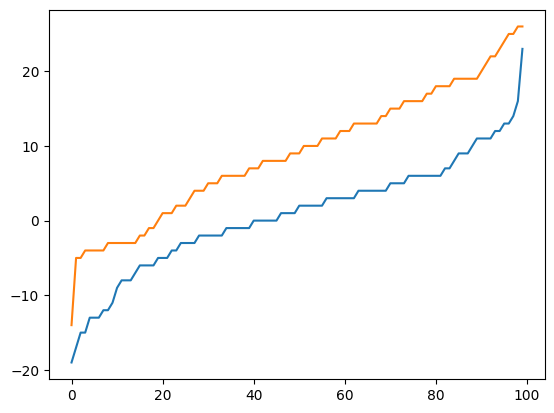

In [47]:
myStrat = getStrategy() # Use default mixed strat (1/3, 1/3, 1/3)
print("Using default mixed strategy (1/3, 1/3, 1/3)")
print(getStrategyPayoff(myStrat, oppStrategy, 100, 100))

updateRegretSum(myStrat, oppStrategy, 100000) # Modify global variable regretSum

myNewStrat = getStrategy()
print("Using Regret matched mixed strategy after training: ", myNewStrat)
print(getStrategyPayoff(myNewStrat, oppStrategy, 100, 100))